In [1]:
from os import listdir
from matplotlib import image
import random
import numpy as np

# load all images in a directory
np.random.RandomState(5)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('../mirflickr25k/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im10357.jpg (500, 500, 3)
> loaded im19341.jpg (500, 356, 3)
> loaded im20654.jpg (375, 500, 3)
> loaded im17630.jpg (351, 500, 3)
> loaded im6795.jpg (375, 500, 3)
> loaded im14524.jpg (500, 250, 3)
> loaded im21202.jpg (346, 500, 3)
> loaded im9015.jpg (500, 332, 3)
> loaded im11052.jpg (500, 375, 3)
> loaded im5052.jpg (321, 500, 3)
> loaded im4791.jpg (500, 333, 3)
> loaded im1379.jpg (333, 500, 3)
> loaded im20669.jpg (375, 500, 3)
> loaded im23845.jpg (334, 500, 3)
> loaded im8553.jpg (259, 500, 3)
> loaded im22227.jpg (416, 500, 3)
> loaded im11014.jpg (500, 333, 3)
> loaded im2444.jpg (500, 338, 3)
> loaded im10663.jpg (500, 375, 3)
> loaded im13947.jpg (333, 500, 3)
> loaded im16883.jpg (375, 500, 3)
> loaded im8735.jpg (404, 500, 3)
> loaded im2825.jpg (464, 500, 3)
> loaded im17049.jpg (500, 375, 3)
> loaded im3825.jpg (333, 500, 3)
> loaded im8261.jpg (500, 375, 3)
> loaded im5760.jpg (500, 342, 3)
> loaded im3708.jpg (333, 500, 3)
> loaded im13837.jpg (335, 500, 3

> loaded im19369.jpg (381, 500, 3)
> loaded im43.jpg (334, 500, 3)
> loaded im16742.jpg (359, 500, 3)
> loaded im20250.jpg (375, 500, 3)
> loaded im21787.jpg (500, 333, 3)
> loaded im1249.jpg (281, 500, 3)
> loaded im12397.jpg (500, 333, 3)
> loaded im23236.jpg (333, 500, 3)


In [2]:
#1.
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [3]:
RED = 0
GREEN = 1
BLUE = 2
#2.a Mat ochikuvannya i dispersiya 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_blue, D_blue))

Red:	mat ochikuvannya - 108.70,	dispersiya - 6163.60
Green:	mat ochikuvannya - 99.80,	dispersiya - 5495.78
Blue:	mat ochikuvannya - 89.87,	dispersiya - 5847.97


In [4]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#2.d Asimmetriya, ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red:	Asimmetriya - 0.252,	Ekscess - -1.174
Green:	Asimmetriya - 0.404,	Ekscess - -0.958
Blue:	Asimmetriya - 0.613,	Ekscess - -0.826


In [5]:
#3. Gethering info vectors
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Ekscess_red]),
                     np.array([M_green, D_green, Asym_green, Ekscess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Ekscess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1
    if (itear % 10 == 0):
        print(str(itear) + " img")

Vector_A:
[[ 1.08704509e+02  6.16359763e+03  2.51828745e-01 -1.17395637e+00]
 [ 9.97991971e+01  5.49577950e+03  4.03593255e-01 -9.57836513e-01]
 [ 8.98719547e+01  5.84796587e+03  6.13232865e-01 -8.26188365e-01]]
10 img
20 img
30 img
40 img
50 img
60 img
70 img
80 img
90 img
100 img
110 img
120 img
130 img
140 img
150 img
160 img
170 img
180 img
190 img
200 img
210 img
220 img
230 img
240 img
250 img


In [61]:
#4. Gaussian models

#a Mat ochikuvannya
P_x1 = np.random.normal(M_red, D_red, 1)
print("Mat ochikuvannya + colors:\n" + str(P_x1))

#b Mat ochikuvannya and dispersion
P_x2 = np.cov(Vector_All_DATA)
print("Mat ochikuvannya + dispersion + colors:\n" + str(P_x2[:2, :2]))

#c Mat ochikuvannya, dispersion and asymetry
print("Mat ochikuvannya + dispersion + asymetry + colors:\n" + str(P_x2[:3, :3]))

#d Mat ochikuvannya, dispersion, asymetry and ekscess
print("Mat ochikuvannya + dispersion + asymetry + ekscess + colors:\n" + str(P_x2[:4, :4]))

Mat ochikuvannya + colors:
[1455.58401662]
Mat ochikuvannya + dispersion + colors:
[[6164.41341013 5127.366324  ]
 [5127.366324   5496.42737747]]
Mat ochikuvannya + dispersion + asymetry + colors:
[[6164.41341013 5127.366324   4525.58191176]
 [5127.366324   5496.42737747 5160.35020174]
 [4525.58191176 5160.35020174 5848.70350154]]
Mat ochikuvannya + dispersion + asymetry + ekscess + colors:
[[6164.41341013 5127.366324   4525.58191176 6164.41341013]
 [5127.366324   5496.42737747 5160.35020174 5127.366324  ]
 [4525.58191176 5160.35020174 5848.70350154 4525.58191176]
 [6164.41341013 5127.366324   4525.58191176 6164.41341013]]


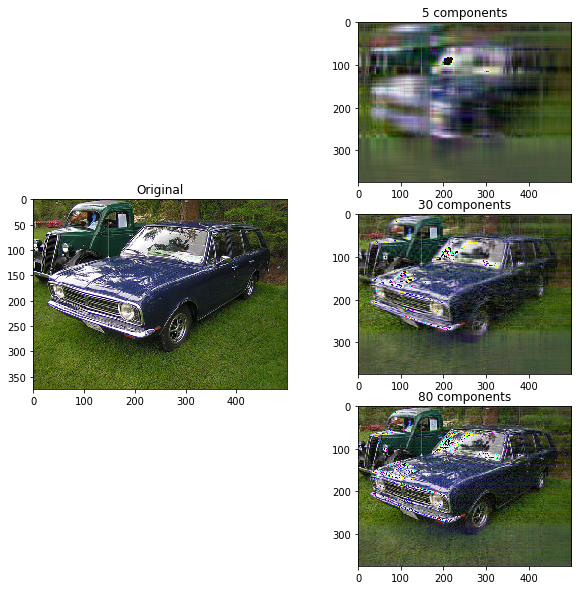

In [14]:
#5. a.Restoring using PCA
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

test_img = loaded_images[2]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[2])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 30), PCA_2d(a_g, 30), PCA_2d(a_b, 30)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('30 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 80), PCA_2d(a_g, 80), PCA_2d(a_b, 80)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('80 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

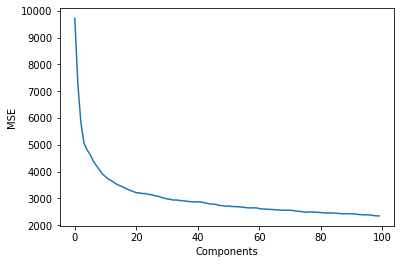

In [15]:
# b.calculating MSE
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [62]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[0.17527675 0.07933579 0.04059041 ... 0.         0.         0.        ]
 [0.18604651 0.04186047 0.05581395 ... 0.         0.         0.        ]
 [0.11848341 0.02843602 0.06635071 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.08095238 0.12619048 0.27380952]
 [0.         0.         0.         ... 0.06970509 0.16621984 0.26809651]
 [0.         0.         0.         ... 0.07055394 0.11137026 0.33411079]]

Red matrix 2nd order:
 [[6.17423992e-02 2.44156378e-02 2.07109672e-02 ... 2.41688769e-04
  5.23919999e-04 1.46420316e-03]
 [6.25854970e-02 2.66901558e-02 2.24826477e-02 ... 1.53634526e-04
  5.14595213e-04 1.10242764e-03]
 [5.09497341e-02 2.23700350e-02 2.04517715e-02 ... 3.71592027e-04
  4.73881468e-04 1.50485782e-03]
 ...
 [3.21301636e-04 2.99768628e-05 3.05413219e-05 ... 5.32813814e-02
  9.07073346e-02 1.96470702e-01]
 [1.20299765e-04 6.17242920e-05 3.30442652e-05 ... 5.62899469e-02
  9.75271735e-02 2.03987630e-01]
 [2.059124

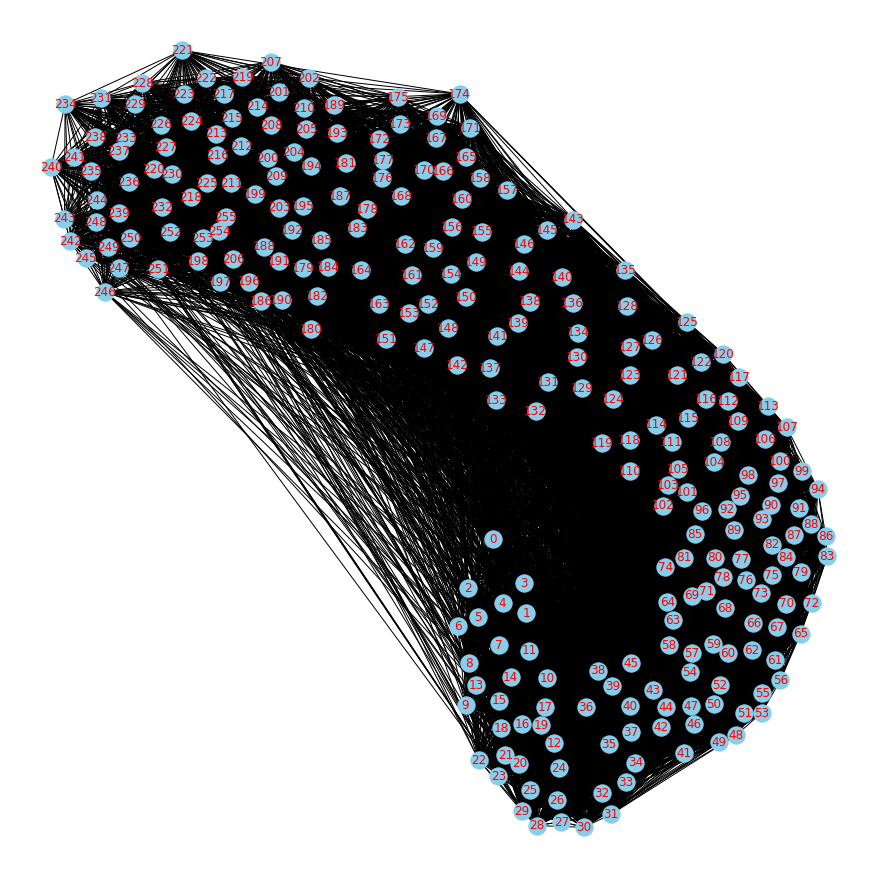

In [57]:
#Graph
import networkx as nx
import pandas as pd

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='skyblue', font_color='red')
plt.show()